In [1]:
from utils import *
from modules import *
import numpy as np 
from numpy import linalg as LA

## Lineaire

In [2]:
# definir un jeu de données lineairement separable 
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 0], [0, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 0], [0, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels = labels.reshape(-1,1)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3032.74it/s]


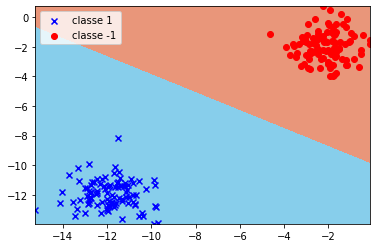

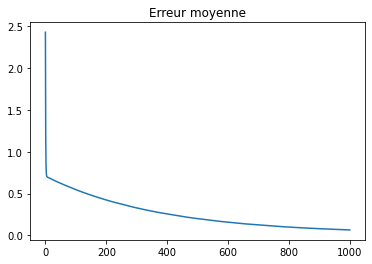

(200, 1)
Accuracy  :  1.0


In [3]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 50
epochs = 1000

lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma,init=1)
mseloss = MSELoss()
network_layers = [lineaire]
network = Sequentiel(network_layers)

opti = Optim(network,mseloss,1e-5)
opti.SGD(data,labels,batch_size,epochs)
opti.affichage(data,labels)

## Non lineaire

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 452.12it/s]


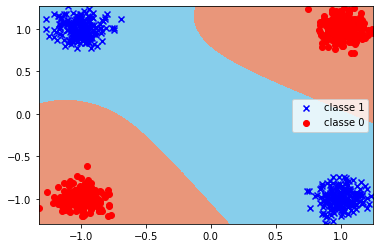

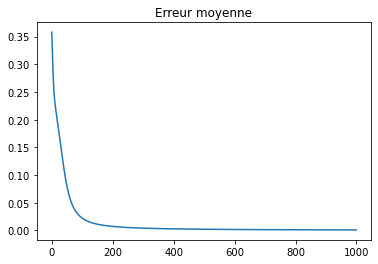

(800, 1)
Accuracy  :  1.0


In [4]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_xor , labels_xor = create_XOR(200,0.01)


neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 1000


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,1e-3)
opti.SGD(data_xor,labels_xor,batch_size,epochs)
opti.affichage(data_xor,labels_xor)

## Multi Classe

In [18]:
import pickle as pkl
data = pkl.load(open("data/usps.pkl",'rb'))

X_train = data["X_train"]
Y_train = data["Y_train"]
X_test = data["X_test"]
Y_test = data["Y_test"]

In [19]:
Y_train

array([0, 9, 7, ..., 6, 3, 2])

In [24]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 60
neuro_i_2 = 60
neuro_o_2 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 50


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
# lineaire_3 = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()
CE = CrossEntropieLoss(nb_classes)
softmax = SoftMax()


network_layers = [lineaire_1,TanH,lineaire_2,softmax]
network = Sequentiel(network_layers)

opti = Optim(network,CE,1e-3)
opti.SGD(X_train,Y_train,batch_size,epochs)

100%|███████████████████████████████████████████| 50/50 [00:10<00:00,  4.84it/s]


In [25]:
opti.getNetwork().accuracy_multi(X_train,Y_train)

0.8929202119120244